01. Import Libraries and Data

2. Merging Data Sets

3. Creating Profile Variables

4. Create Visualizations

5. Min/Mean/Max Variables for Customer Profiles

6. Export Data

01. Import Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#Import Data
path=r'/Users/jakeupchurch/Documents/Instacart Basket Analysis'

In [3]:
#Import Departments Data
df_depts=pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'))
df_depts.shape

(21, 2)

In [4]:
#Import Customer Data
ords_prods_active=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_active.pkl'))
ords_prods_active.shape

(30992664, 33)

In [5]:
#Creating Settings to Save Run Time for Commands
pd.set_option('display.max_rows', 100, 'display.max_columns', 100,)

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)

02. Merging Data Sets

In [7]:
#Checking DF
df_depts.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [8]:
#Use Unnamed Column for department_id
df_depts.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_depts.head(5)

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [9]:
#Merge df_depts and ords_prods_active
df_opd = ords_prods_active.merge(df_depts, on='department_id', indicator='exists')

In [10]:
df_opd.head()

product_id                     product_name  aisle_id  department_id  \
0           1       Chocolate Sandwich Cookies        61             19   
1           1       Chocolate Sandwich Cookies        61             19   
2        4913             Table Water Crackers        78             19   
3       11759  Organic Simply Naked Pita Chips       107             19   
4       13424                          Almonds        45             19   

   prices  order_id user_id  order_number  orders_day_of_week  \
0    5.80   3139998     138            28                   6   
1    5.80   1977647     138            30                   6   
2    4.40    894221     138            23                   5   
3    4.40   1986630     138             7                   0   
4    4.20   3139998     138            28                   6   

   order_hour_of_day  days_since_last_order  add_to_cart_order  reordered  \
0                 11                   3.00                  5          0   
1                 17                  20.00                  1          1   
2                 13                  24.00                  3          0   
3                 12                   7.00                  2          0   
4                 11                   3.00                  4          0   

     price_range_loc     busiest day     busiest_day busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy           Most orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product     Busiest day     Busiest day        Average orders   
4  Low-range product  Regularly busy  Regularly busy           Most orders   

   max_order      loyalty_flag  average_price spending_flag  median_orders  \
0         32  Regular customer           6.94   Low spender           8.00   
1         32  Regular customer           6.94   Low spender           8.00   
2         32  Regular customer           6.94   Low spender           8.00   
3         32  Regular customer           6.94   Low spender           8.00   
4         32  Regular customer           6.94   Low spender           8.00   

  order_frequency_flag gender      state  age date_joined  n_dependants  \
0    Frequent customer   Male  Minnesota   81  2019-08-01             1   
1    Frequent customer   Male  Minnesota   81  2019-08-01             1   
2    Frequent customer   Male  Minnesota   81  2019-08-01             1   
3    Frequent customer   Male  Minnesota   81  2019-08-01             1   
4    Frequent customer   Male  Minnesota   81  2019-08-01             1   

  fam_status  income _merge regional_flag Customer_activity department exists  
0    married   49620   both           NaN            Active     snacks   both  
1    married   49620   both           NaN            Active     snacks   both  
2    married   49620   both           NaN            Active     snacks   both  
3    married   49620   both           NaN            Active     snacks   both  
4    married   49620   both           NaN            Active     snacks   both

In [11]:
#Check Value Counts
df_opd['exists'].value_counts()

exists
both          30992664
left_only            0
right_only           0
Name: count, dtype: int64

3. Create Profiling Variable

In [12]:
#Create Age Group Flag
df_opd.loc[(df_opd['age'] >=18) & (df_opd['age'] <28), 'age_group'] = '18_27'
df_opd.loc[(df_opd['age'] >=28) & (df_opd['age'] <38), 'age_group'] = '28_37'
df_opd.loc[(df_opd['age'] >=38) & (df_opd['age'] <48), 'age_group'] = '38_47'
df_opd.loc[(df_opd['age'] >=48) & (df_opd['age'] <58), 'age_group'] = '48_57'
df_opd.loc[(df_opd['age'] >=58) & (df_opd['age'] <68), 'age_group'] = '58_67'
df_opd.loc[(df_opd['age'] >=68), 'age_group'] = '68_over'

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/1292106296.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18_27' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[(df_opd['age'] >=18) & (df_opd['age'] <28), 'age_group'] = '18_27'


In [13]:
#Data Check
df_opd['age_group'].value_counts(dropna = False)

age_group
68_over    6809421
48_57      4900542
18_27      4860084
38_47      4850903
28_37      4835742
58_67      4735972
Name: count, dtype: int64

In [14]:
#Create Sample Data Set
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

In [15]:
#Create 70/30 DataFrames
df_opd_big = df_opd[dev]
df_opd_small = df_opd[~dev]

In [16]:
#Data Check
len(df_opd_big)+len(df_opd_small)

30992664

4. Create Visualizations

In [17]:
#Hide columns that are not useful for visualization
df_age_group_sample = df_opd_small[['age','regional_flag','age_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_age_group_sample.shape

(9297011, 8)

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/1082754661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_age_group_sample,
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.typ

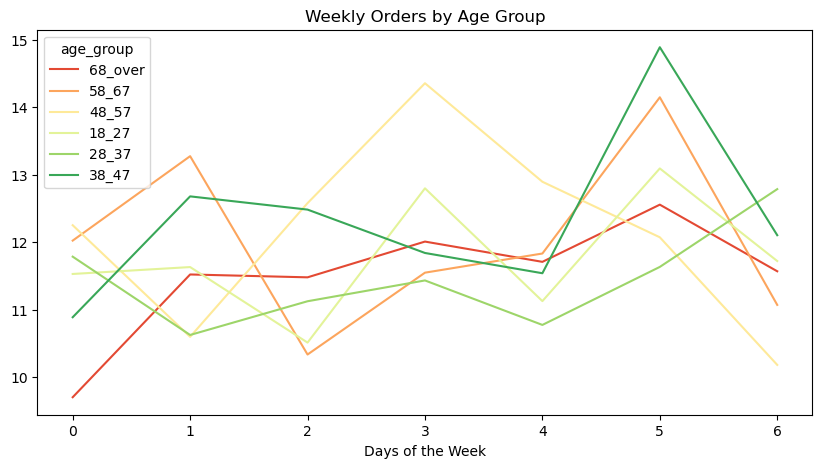

In [18]:
#Create Line Chart Comparing Order Days of Week and Age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Weekly Orders by Age Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Age_group_dow.png')
plt.show()

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/989186366.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_age_group_sample,
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

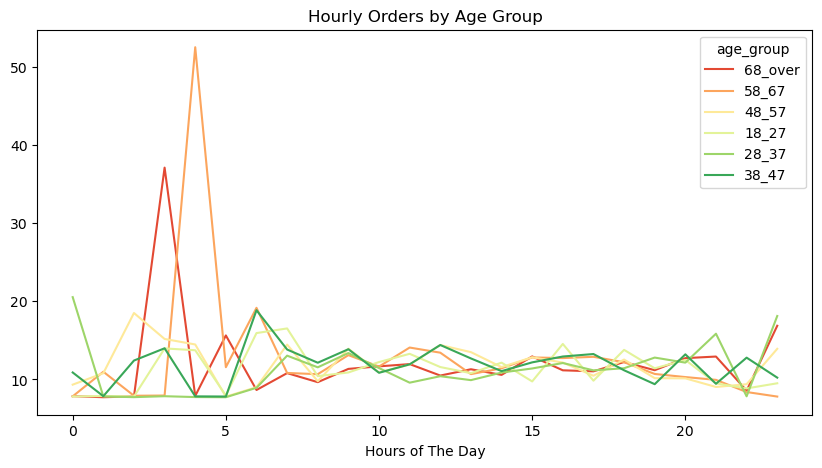

In [19]:
#Create Line Chart for Order Hours and Age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Hourly Orders by Age Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Age_group_HOD.png')
plt.show()

In [20]:
#Create Visualization for Regional Purchases
#Create Data Set with only necessary columns
df_age_group_sample_agg = df_age_group_sample.groupby(['department', 'age_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_age_group_sample_agg.head(3)

department age_group regional_flag  order_id   prices
0    alcohol     18_27       Midwest       936  7614.30
1    alcohol     18_27     Northeast      1177  9530.20
2    alcohol     18_27         South      1893 15584.40

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_

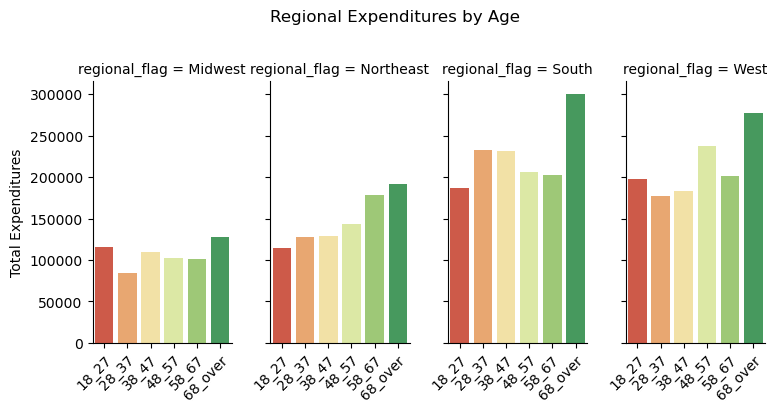

In [21]:
#Bar Chart for Regional Sales by Age
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "prices", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Age")
g.figure.subplots_adjust(top=.8)

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_

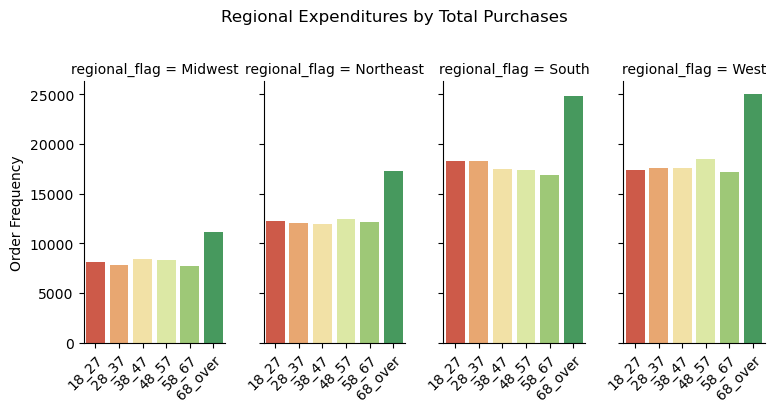

In [22]:
#Bar Chart for Regional Sales by Total Purchase
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "order_id", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases")
g.figure.subplots_adjust(top=.8)

5. Max/Mean/Min Variables for Customer Profiles

In [23]:
#Checking Income Variable
df_opd['income'].describe()

count   30992664.00
mean       99673.22
std        43139.28
min        25903.00
25%        67289.00
50%        96765.00
75%       128101.00
max       593901.00
Name: income, dtype: float64

In [24]:
#Create User Flag for Income Levels
df_opd.loc[(df_opd['income'] <=67292), 'income_group'] = 'Lowest_income'
df_opd.loc[(df_opd['income'] > 67292) & (df_opd['income'] < 128102), 'income_group'] = 'Avg_income'
df_opd.loc[(df_opd['income'] >= 128102), 'income_group'] = 'Highest_income'

#check
df_opd.head(3)

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/1502724752.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lowest_income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[(df_opd['income'] <=67292), 'income_group'] = 'Lowest_income'


product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19    5.80   
1           1  Chocolate Sandwich Cookies        61             19    5.80   
2        4913        Table Water Crackers        78             19    4.40   

   order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   3139998     138            28                   6                 11   
1   1977647     138            30                   6                 17   
2    894221     138            23                   5                 13   

   days_since_last_order  add_to_cart_order  reordered    price_range_loc  \
0                   3.00                  5          0  Mid-range product   
1                  20.00                  1          1  Mid-range product   
2                  24.00                  3          0  Low-range product   

      busiest day     busiest_day busiest_period_of_day  max_order  \
0  Regularly busy  Regularly busy           Most orders         32   
1  Regularly busy  Regularly busy        Average orders         32   
2  Regularly busy  Regularly busy        Average orders         32   

       loyalty_flag  average_price spending_flag  median_orders  \
0  Regular customer           6.94   Low spender           8.00   
1  Regular customer           6.94   Low spender           8.00   
2  Regular customer           6.94   Low spender           8.00   

  order_frequency_flag gender      state  age date_joined  n_dependants  \
0    Frequent customer   Male  Minnesota   81  2019-08-01             1   
1    Frequent customer   Male  Minnesota   81  2019-08-01             1   
2    Frequent customer   Male  Minnesota   81  2019-08-01             1   

  fam_status  income _merge regional_flag Customer_activity department exists  \
0    married   49620   both           NaN            Active     snacks   both   
1    married   49620   both           NaN            Active     snacks   both   
2    married   49620   both           NaN            Active     snacks   both   

  age_group   income_group  
0   68_over  Lowest_income  
1   68_over  Lowest_income  
2   68_over  Lowest_income

In [25]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_opd_big2 = df_opd[dev]
df_opd_small2 = df_opd[~dev]

#quality check
len(df_opd_big2)+len(df_opd_small2)

30992664

In [26]:
#Sample Income Data to Create Visualizations
df_income_group_sample = df_opd_small2[['regional_flag','income_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_income_group_sample.head()

regional_flag   income_group  orders_day_of_week  order_hour_of_day  \
0            NaN  Lowest_income                   6                 11   
2            NaN  Lowest_income                   5                 13   
3            NaN  Lowest_income                   0                 12   
6            NaN  Lowest_income                   5                 12   
10           NaN  Lowest_income                   0                  9   

   department  prices  order_id  
0      snacks    5.80   3139998  
2      snacks    4.40    894221  
3      snacks    4.40   1986630  
6      snacks    3.90   2226790  
10     snacks    5.10   1592314

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/732573209.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_income_group_sample,
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.t

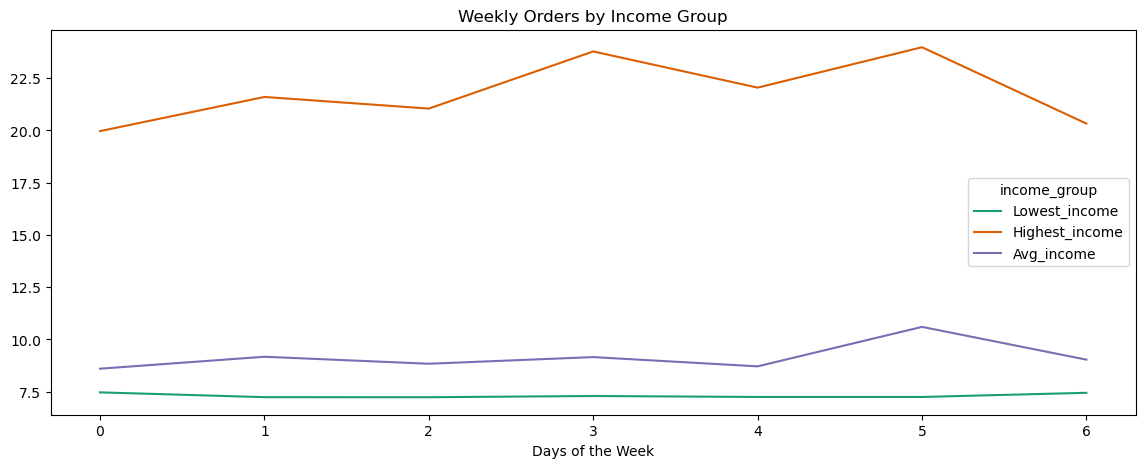

In [27]:
#Line Chart Comparing Order Days of Week and Income
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_income_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Weekly Orders by Income Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Income_group_dow.png')
plt.show()

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_4235/3997602713.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_income_group_sample,
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

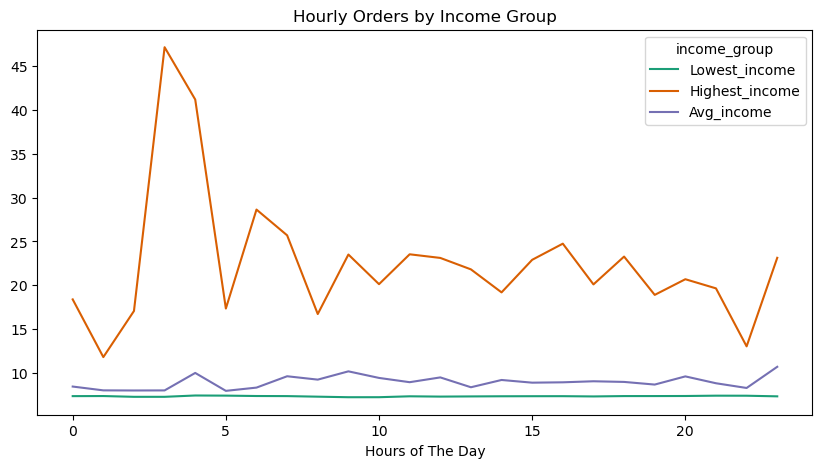

In [28]:
#Line Chart Comparing Order Hours and Income
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_income_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Hourly Orders by Income Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Income_group_HOD.png')
plt.show()

In [29]:
#Regional Income Visualization
df_income_group_sample_agg = df_income_group_sample.groupby(['department', 'income_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_income_group_sample_agg.head(3)

department income_group regional_flag  order_id   prices
0    alcohol   Avg_income       Midwest      2516 21443.10
1    alcohol   Avg_income     Northeast      3173 25687.40
2    alcohol   Avg_income         South      5181 43626.50

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_

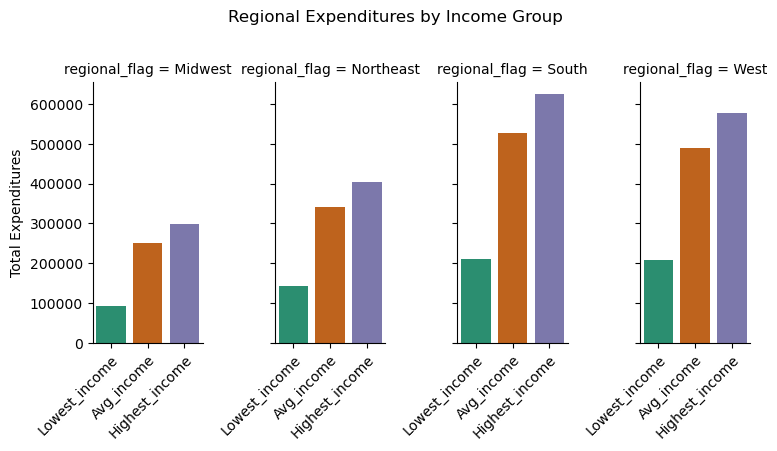

In [30]:
#Create Visualization for Total Purchases by Income Group
g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "income_group", "prices", palette='Dark2',ci=None, order=['Lowest_income', 'Avg_income','Highest_income'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Income Group")
g.figure.subplots_adjust(top=.8)

Observations:  The South Region and West Region spend the most money, with the older age groups in each of these regions spending more than younger age groups.  More analysis to follow in final deliverable to customer.

6. Export Data

In [31]:
#Export Data
df_opd.to_pickle(os.path.join(path,'02 Data','Prepared Data','Orders_products_departments_active.pkl'))